In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.8.2


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Informações sobre a base de dados

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)


10000

## Pré-Processamento dos Dados


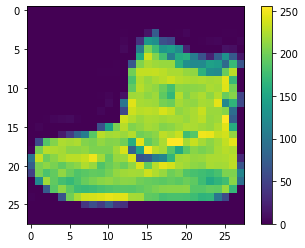

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0


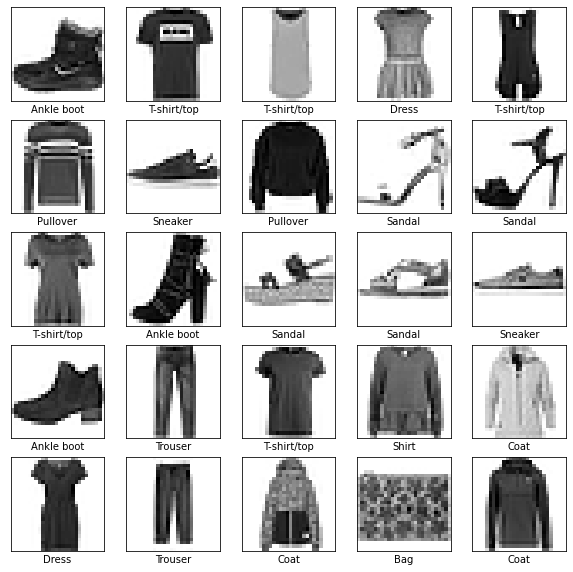

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Construção do Modelo

### Montando as camadas

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


### Compilando o Modelo

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Treinamento do Modelo

In [13]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4924 - accuracy: 0.8282
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3727 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3117 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2938 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2793 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2569 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2483 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

### Verificando a acurária do modelo

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3567 - accuracy: 0.8804 - 1s/epoch - 3ms/step

Test accuracy: 0.8804000020027161


### Realizando as Predições

In [15]:
predictions = model.predict(test_images)


In [16]:
predictions[0]


array([4.0680644e-07, 1.8849586e-09, 1.0322109e-08, 9.4735014e-07,
       4.8277887e-10, 2.8062129e-04, 3.2847986e-08, 2.0641349e-02,
       1.2621064e-07, 9.7907650e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])


9

In [18]:
test_labels[0]


9

### Exibindo a previsão greficamente 

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


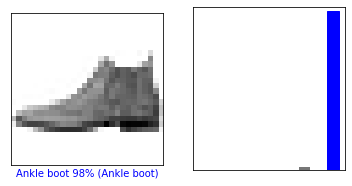

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


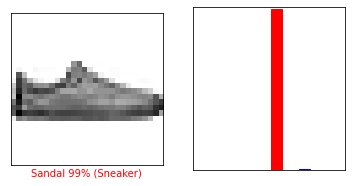

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


### Plotando algumas predições (15)

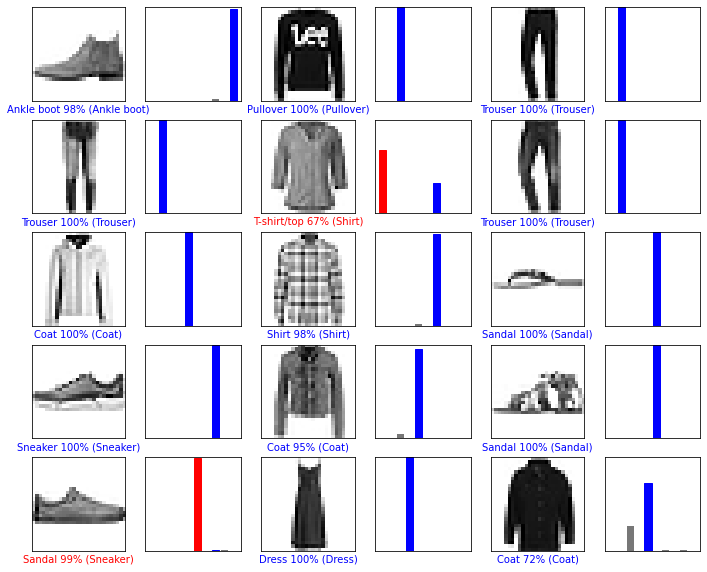

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


### Usando o modelo para predição de uma imagem

In [23]:
img = test_images[0]

print(img.shape)


(28, 28)


In [24]:
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [25]:
predictions_single = model.predict(img)

print(predictions_single)


[[4.0680644e-07 1.8849553e-09 1.0322109e-08 9.4734833e-07 4.8277887e-10
  2.8062100e-04 3.2847986e-08 2.0641349e-02 1.2621088e-07 9.7907650e-01]]


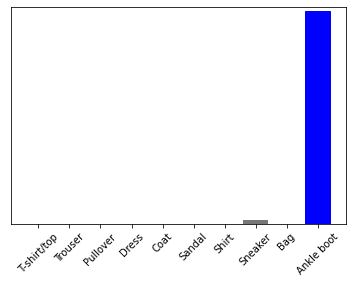

In [26]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


### Resultado da predição do label conforme predito anteriormente.

In [27]:
np.argmax(predictions_single[0])


9